In [1]:
pwd

'/home/bijanadmin/Dropbox/WORK/SPEECH_STUDY/Python_speech_study'

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from itertools import groupby
import seaborn as sns
from operator import itemgetter 
import matplotlib.colors as mcolors
import sys

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# np.set_printoptions(threshold=sys.maxsize)

In [239]:
patient = 1
path_dir = '../3.NO_ARREST/{}/NoN'.format(patient)
print(path_dir)

fn_NoN = os.path.join(path_dir,'NoN_nodes_mod.txt')
NoN = np.loadtxt(fn_NoN) # file which contains the coordinates and cluster labels
fn_J = os.path.join(path_dir,'J_NoN.txt') # matrix J path
J = np.loadtxt(fn_J,dtype='f',delimiter='\t') # matrix J

# file name for the figure to save
fn_figure = os.path.join(path_dir,'Kcore_arrest_patient_{}.png'.format(patient))

# index ROIs 
lab_ROI = [0,1,2,5,6,7,8,10,11,12] # ROI index in the universal map, order sequentially (universal order)
lab_ROI_ind = [0,5,1,4,2,3,6,9,8,7] # ROI index, individual map, ordered according to the universal order (order can be mixed, not ascending)
lab_ROI_comm = [0,1,2,8] # ROI index of the common network in the universal map 
lab_ROI_comm_ind = [0,1,5,6] # ROI index of the common network in the individual map - order must be ascendin4

# lab_ROI = list(np.loadtxt(os.path.join(path_dir,'labels_ROI_universal.txt'),dtype='i'))
# lab_ROI_ind = list(np.loadtxt(os.path.join(path_dir,'labels_ROI_individual.txt'),dtype='i'))
# lab_ROI_comm = list(np.loadtxt(os.path.join(path_dir,'labels_ROI_comm_universal.txt'),dtype='i'))
# lab_ROI_comm_ind = list(np.loadtxt(os.path.join(path_dir,'labels_ROI_comm_individual.txt'),dtype='i'))

np.savetxt(os.path.join(path_dir,'labels_ROI_universal.txt'), lab_ROI, delimiter=' ',fmt='%d')  
np.savetxt(os.path.join(path_dir,'labels_ROI_individual.txt'), lab_ROI_ind, delimiter=' ',fmt='%d')  
np.savetxt(os.path.join(path_dir,'labels_ROI_comm_universal.txt'), lab_ROI_comm, delimiter=' ',fmt='%d')  
np.savetxt(os.path.join(path_dir,'labels_ROI_comm_individual.txt'), lab_ROI_comm_ind, delimiter=' ',fmt='%d') 

print(lab_ROI)
print(lab_ROI_ind)
print(lab_ROI_comm)
print(lab_ROI_comm_ind)

../3.NO_ARREST/10/NoN
[0, 1, 2, 5, 6, 7, 8, 10, 11, 12]
[0, 5, 1, 4, 2, 3, 6, 9, 8, 7]
[0, 1, 2, 8]
[0, 1, 5, 6]


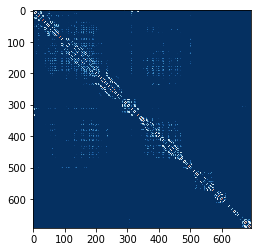

In [240]:
plt.imshow(J,cmap='RdBu')

In [241]:
# labels for the clusters
labels = np.int_(NoN[:,5])
# list of nodes
nodes = np.arange(1,labels.shape[0]+1)
# list of edges
edges = []

# assign the edges
for i in range(J.shape[0]):
    for j in range(J.shape[0]):
        if J[i,j] != 0:
            edges.append([i,j])
            
# size of each cluster
size_mod_temp = [len(list(group)) for key, group in groupby(labels)] # how many elements in each module 
print(size_mod_temp)  #before reordering
# reorder size of each cluster according to the universal order
size_mod = [size_mod_temp[i] for i in lab_ROI_ind]
print(size_mod) # after reordering - the order is according to the universal order

[88, 194, 53, 68, 73, 30, 69, 37, 41, 39]
[88, 30, 194, 73, 53, 68, 69, 39, 41, 37]


In [242]:
# indexes for beginning of a new cluster 
len_mod = [] # len_mod contains the length (size) of each cluster
len_mod.append(size_mod[0])
for item in range(1,len(size_mod)):
    len_mod.append(len_mod[item-1]+size_mod[item])
print(len_mod) 

[88, 118, 312, 385, 438, 506, 575, 614, 655, 692]


In [243]:
net = nx.Graph()
net.add_nodes_from(nodes)
net.add_edges_from(edges)
# nx.draw(net,with_labels=True)
# ascella = nx.k_core(net)
kcore = nx.core_number(net)
# print(kcore)
# kcore[0]

In [244]:
core_num = [] # list containing the core numbers
for key in kcore: 
    core_num.append(kcore[key])

ROIs = [] # list which contains the kcore of all the nodes, divided by ROI, order according to universal map
ROIs.append(core_num[0:len_mod[0]]) # first ROI
for i in range(0,len(len_mod)-1):
    ROIs.append(core_num[len_mod[i]:len_mod[i+1]]) # all others ROIs
print(len(ROIs))
print(labels[-1])
print(lab_ROI_comm_ind)

ROIs_common = []
for i in lab_ROI_comm_ind:
    ROIs_common.append(ROIs[i])

10
10
[0, 1, 5, 6]


In [245]:
# print(ROIs_common[1])
print(size_mod)
for i in range(len(ROIs)):
    print(len(ROIs[i]),end=', ')
print()
for i in range(len(ROIs_common)):
    print(len(ROIs_common[i]),end=', ')



[88, 30, 194, 73, 53, 68, 69, 39, 41, 37]
88, 30, 194, 73, 53, 68, 69, 39, 41, 37, 
88, 30, 68, 69, 

['BA (L)' 'WA (L)' 'PreM (L)' 'SupM (L)' 'IOA (L)' 'AngG (L)' 'SMA'
 'IOA (R)' 'SupM (R)' 'MFG (R)']
[0, 1, 2, 5, 6, 7, 8, 10, 11, 12]
['BA (L)' 'WA (L)' 'PreM (L)' 'SMA']


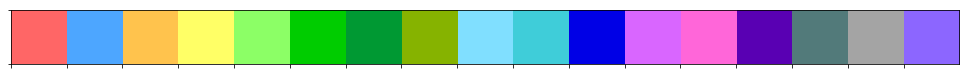

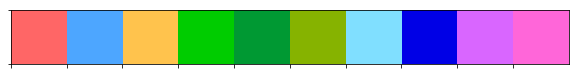

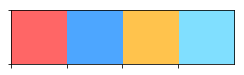

In [246]:
# colors
colors = np.array(["#ff6666",'#4da6ff','#ffc34d','#ffff66','#8cff66','#00cc00','#009933','#86b300','#80dfff','#3fcdd9','#0000e6','#d966ff','#ff66d9','#5900b3','#527a7a','#a4a4a4','#8c66ff'])
# sns.palplot(sns.color_palette(colors))
# print(len(colors)) 66ffd9

# Name all ROIs
ROI_names_all = np.array(['BA (L)','WA (L)','PreM (L)','Motor (L)','MFG (L)','SupM (L)','IOA (L)','AngG (L)','SMA','AngG (R)','IOA (R)','SupM (R)','MFG (R)','Motor (R)','PREM (R)','WA (R)','BA (R)'])
# colors = np.array(["crimson","orangered","salmon","amber","wheat","beige","lime","lightgreen","aquamarine","turquoise","sky blue","azure","windows blue","cobalt","lilac","periwinkle","violet"])

# ROI names and ROI common names
ROI_names = ROI_names_all[lab_ROI]
ROI_names_common = ROI_names_all[lab_ROI_comm]
print(ROI_names)
print(lab_ROI)
print(ROI_names_common)

# ROI colors
ROI_colors = colors[lab_ROI]
ROI_colors_common = colors[lab_ROI_comm]

# palette
sns.palplot(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors[lab_ROI]))
sns.palplot(sns.color_palette(colors[lab_ROI_comm]))

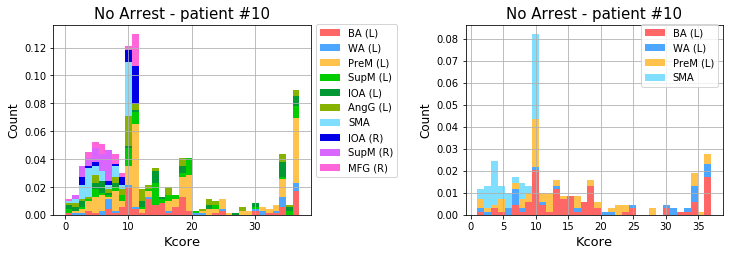

In [248]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,3.5))

# ax1.set_ylim([0, 0.34])
# ax2.set_ylim([0, 0.16]) 

######### 1st histogram
ax1.set_xlabel('Kcore',fontsize=13)
ax1.set_ylabel('Count',fontsize=12)
ax1.set_title('No Arrest - patient #{}'.format(patient),fontsize=15)

# # weights
# # weights
# w_ROI = np.empty_like(ROIs)
# for i in range(len(ROIs)):
#     w_ROI[i] = np.ones_like(ROIs[i])/len(labels)

 
weights_ROI = []
for i in range(len(lab_ROI)):
    weights_ROI.append(np.ones_like(ROIs[i])/len(labels))
    
    
ax1.hist(ROIs,35,weights=weights_ROI,stacked=True,label=ROI_names,color=ROI_colors)
# ax1.hist(ROIs,35,density=True,stacked=True,label=ROI_names,color=ROI_colors)


ax1.legend()
ax1.legend(bbox_to_anchor=(1., 1.03))
ax1.grid(True)

# ######## 2nd histogram
ax2.set_xlabel('Kcore',fontsize=13)
ax2.set_ylabel('Count',fontsize=12)
ax2.set_title('No Arrest - patient #{}'.format(patient),fontsize=15)


# # weights
weights_ROI = []
for i in range(len(ROIs_common)):
    weights_ROI.append(np.ones_like(ROIs_common[i])/len(labels))


ax2.hist(ROIs_common,34,weights=weights_ROI,stacked=True,label=ROI_names_common,color=ROI_colors_common)

ax2.legend()
ax2.legend(bbox_to_anchor=(1., 1.03))
ax2.grid(True)


plt.subplots_adjust(wspace=0.6)
plt.show()

fig.savefig(fn_figure,bbox_inches='tight')
plt.close(fig)


In [248]:
# ROIs = [[1 for i in range(5) ] for i in range(17)]
# print(len(ROIs[1]))
# list_ROI = list(np.arange(17)) # ROI index in the universal map
# list_ROI_common = [0,1,2,8] # ROI index of the common network in the universal map 
# ROI_common_individual = [0,1,4] # ROI index of the common network in the individual map

In [251]:
# col = np.array(["crimson","orangered","salmon","amber","wheat","beige","lime","lightgreen","aquamarine","turquoise","sky blue","azure","windows blue","cobalt","lilac","periwinkle","violet"])

# colors = np.array(["#ff6666",'#ffb366','#ffd966','#ffff66','#d9ff66','#8cff66','#00e639','#009933','#66ffd9','#00e6e6','#66b3ff','#0073e6','#0000e6','#8c66ff','#d966ff','#ff66d9','#5900b3'])
# sns.palplot(sns.color_palette(colors))
# print(len(colors))


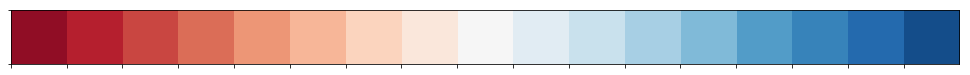

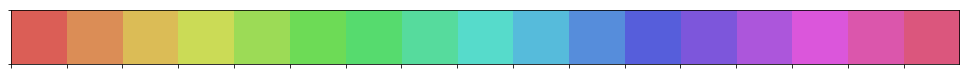

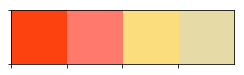

In [219]:
# sns.palplot(sns.color_palette("Set2", 17))
# # sns.palplot(sns.color_palette("deep", 9))
# sns.palplot(sns.color_palette("pastel", 9))
import matplotlib
import matplotlib.colors as mcolors
# sns.palplot(sns.color_palette("cubehelix", 8))
sns.palplot(sns.color_palette("RdBu", n_colors=17))
sns.palplot(sns.color_palette("hls", n_colors=17))


colors = ["crimson","orangered","salmon","amber","wheat","beige","lime","lightgreen","aquamarine","turquoise","sky blue","azure","windows blue","cobalt","lilac","periwinkle","violet"]
selection = [1,2,4,5]
itemgetter(*selection)(colors)
sns.palplot(sns.xkcd_palette(itemgetter(*selection)(colors)))
# ROI_colors = [*itemgetter(selection)(colors)]
